# k-means clustering (greyscale)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

im:
<class 'numpy.ndarray'>
(100, 100, 4)


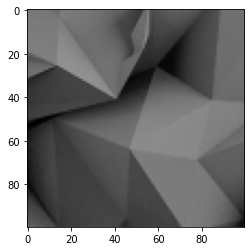

In [2]:
im = plt.imread("greyscale.png")

print("im:")
print(type(im))
print(np.shape(im))
plt.imshow(im, aspect="equal")

# convert values to 0 - 255
original = (im[:,:,0] * 255).astype(int)

[width, height] = np.shape(original)

# Algorithm
1. Choose number of clusters

In [3]:
k = 9

2. Place inicial centroids

In [4]:
centroids = np.linspace(np.amin(original), np.amax(original), num = k).astype(int)
print(centroids)

[  1  19  38  56  75  93 112 130 149]


3. Find distanceof each point in the dataset to each centroid

In [5]:
def get_distances(array, targets):
    distances = np.zeros((np.shape(array)[0], np.shape(array)[1], len(targets)))
    
    for a in range(len(targets)):
        distances[:,:,a] = np.absolute(array[:,:] - targets[a])
    
    return distances

distances = get_distances(original, centroids)

print("shape: ", np.shape(distances), "\n")
print(distances[:, :, 0], "\n\n-----||-----||-----\n")
print(distances[:, :, 1], "\n\n-----||-----||-----\n")
print(distances[:, :, 2])

shape:  (100, 100, 9) 

[[118. 118. 119. ... 111. 112. 112.]
 [119. 119. 120. ... 111. 111. 111.]
 [120. 121. 119. ... 111. 110. 110.]
 ...
 [ 86.  89.  87. ...  29.  22.  15.]
 [ 91.  90.  89. ...  20.  14.  17.]
 [ 94.  94.  94. ...  17.  11.  20.]] 

-----||-----||-----

[[100. 100. 101. ...  93.  94.  94.]
 [101. 101. 102. ...  93.  93.  93.]
 [102. 103. 101. ...  93.  92.  92.]
 ...
 [ 68.  71.  69. ...  11.   4.   3.]
 [ 73.  72.  71. ...   2.   4.   1.]
 [ 76.  76.  76. ...   1.   7.   2.]] 

-----||-----||-----

[[81. 81. 82. ... 74. 75. 75.]
 [82. 82. 83. ... 74. 74. 74.]
 [83. 84. 82. ... 74. 73. 73.]
 ...
 [49. 52. 50. ...  8. 15. 22.]
 [54. 53. 52. ... 17. 23. 20.]
 [57. 57. 57. ... 20. 26. 17.]]


4. Assign each datapoint to the closest centroid using these distances.

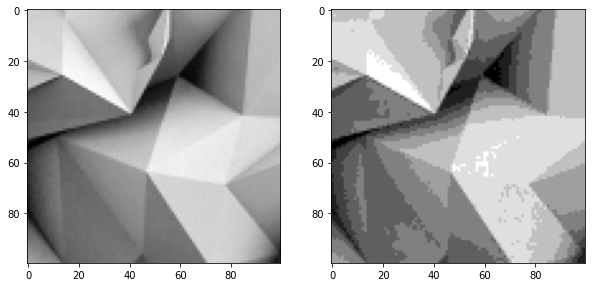

In [6]:
current = np.zeros( ( np.shape(original)[0], np.shape(original)[1] ) )

def closest_centroid(distances, centroids):
    for a in range(len(centroids)):
        if distances[a] == np.amin(distances):
            return centroids[a]
        
    return False

for yy in range(height):
    for xx in range(width):
        current[yy,xx] = closest_centroid(distances[yy,xx,:], centroids)
        
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.imshow(original, cmap = "gray", aspect = "equal")
ax2.imshow(current, cmap = "gray",aspect = "equal")

5. re-calculate centroids

In [7]:
def update_centroids(original, current, centroid):
    summ = 0
    total = 0
    for yy in range(height):
        for xx in range(width):
            if current[yy, xx] == centroid:
                summ += original[yy, xx]
                total += 1
    return (summ / total).astype(int)


Repeat steps 3 - 5

cycle =  0
centroids =  [  1  19  38  56  75  93 112 130 149] 

cycle =  1
centroids =  [  6  19  39  59  72  92 111 128 142] 

cycle =  2
centroids =  [  6  19  39  59  72  92 111 128 142] 

cycle =  3
centroids =  [  6  19  39  59  72  92 111 128 142] 

cycle =  4
centroids =  [  6  19  39  59  72  92 111 128 142] 

cycle =  5
centroids =  [  6  19  39  59  72  92 111 128 142] 



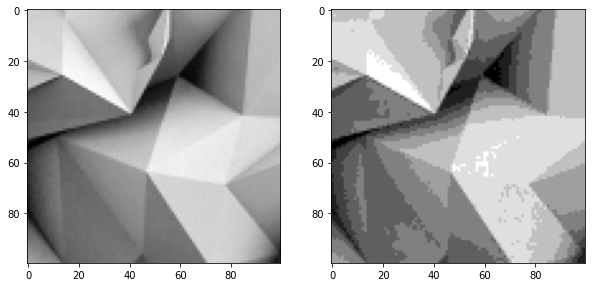

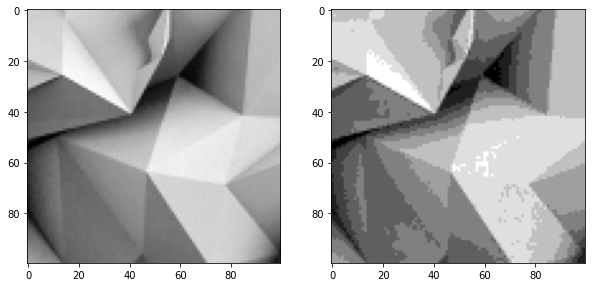

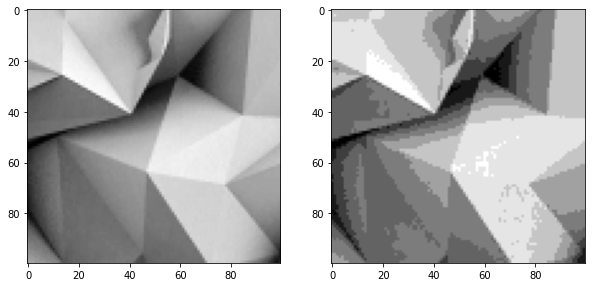

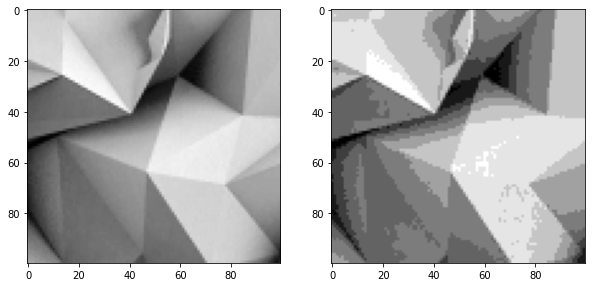

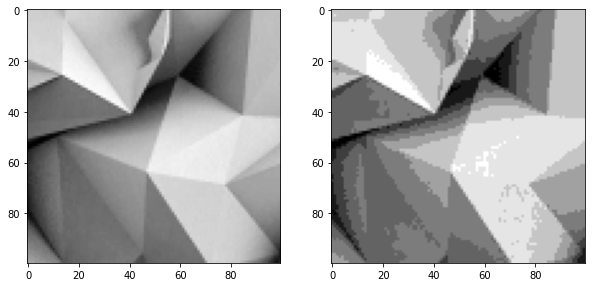

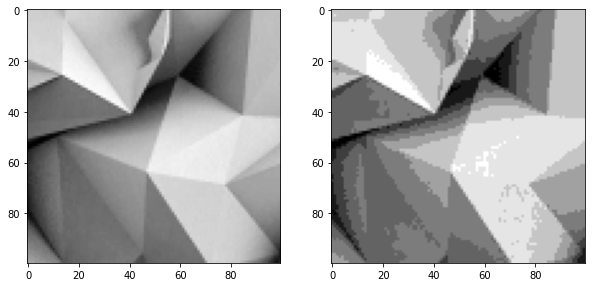

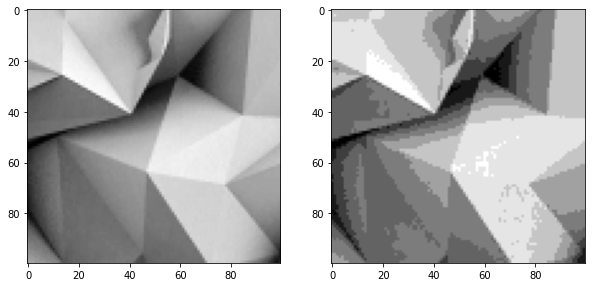

In [8]:
iteration = 0
max_iter = 5
while True:
    print("cycle = ", iteration)
    print("centroids = ", centroids, "\n")
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
    ax1.imshow(original, cmap = "gray", aspect = "equal" )
    ax2.imshow(current, cmap = "gray", aspect = "equal")
    
    for yy in range(height):
        for xx in range(width):
            current[yy, xx] = closest_centroid(distances[yy, xx, :], centroids)
    
    if iteration == max_iter:
        break
    
    # update centroids
    for cent in range(k):
        centroids[cent] = update_centroids(original, current, centroids[cent])
    
    # calculate new distances
    distances = get_distances(current, centroids)
    iteration += 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.imshow(original, cmap = "gray", aspect = "equal" )
ax2.imshow(current, cmap = "gray", aspect = "equal")
plt.show()
